In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
meta = pd.read_csv('../data/ESC-50/meta/esc50.csv')

In [3]:
meta.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


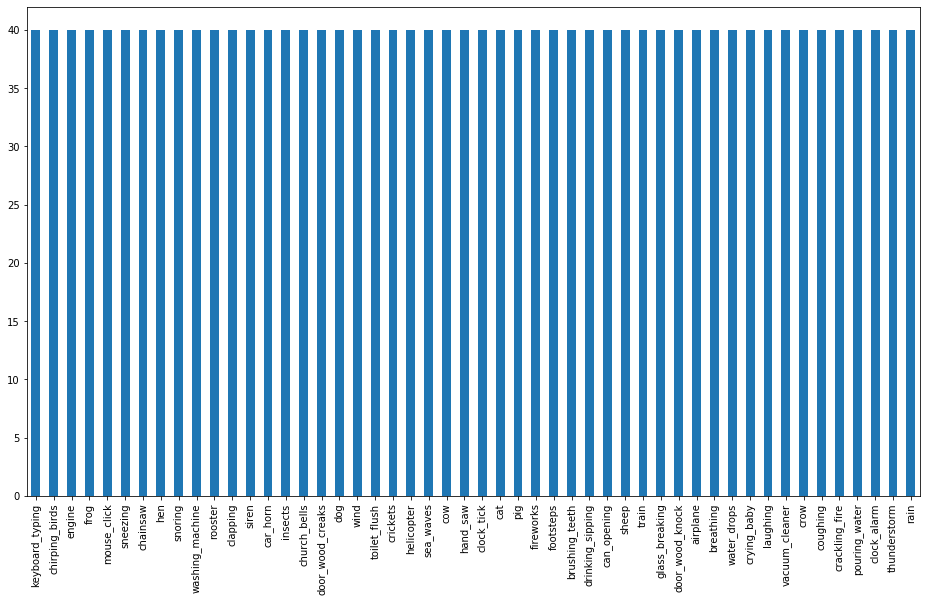

In [4]:
plt.figure(figsize=(16, 9))
meta['category'].value_counts().plot.bar()

In [5]:
N = meta.shape[0]
N

2000

In [6]:
data = [None] * N

In [7]:
file_root = '../data/ESC-50/audio/'
file_list = meta['filename'].values
file_list

array(['1-100032-A-0.wav', '1-100038-A-14.wav', '1-100210-A-36.wav', ...,
       '5-51149-A-25.wav', '5-61635-A-8.wav', '5-9032-A-0.wav'],
      dtype=object)

In [8]:
SR = 44100
n_fft = 2048
win_length = 2048
hop_length = 1024
n_mels = 128

In [9]:
for i in tqdm(range(N)):
    path = file_root + file_list[i]
    y, sr = librosa.load(path, sr=SR, mono=False)
    S = librosa.feature.melspectrogram(y, sr=SR, n_mels = n_mels, n_fft=n_fft, win_length=win_length, hop_length=hop_length)
    S = librosa.core.power_to_db(S)
    data[i] = S

100%|██████████| 2000/2000 [00:17<00:00, 117.18it/s]


In [10]:
data = np.array(data) 
data = data[:, :, :, np.newaxis]

In [11]:
cats = ['dog', 'crying_baby', 'door_wood_knock', 'helicopter']

In [12]:
def plot_melspectrogram(c):
    idx = (meta['category'] == c).idxmax()
    S = data[idx, :, :, 0]
    plt.imshow(np.flip(S, axis=0), cmap='magma')
    plt.xlabel('Time')
    plt.ylabel('mel')
    plt.title(c)
    plt.savefig('../png/'+ c + '.png')
    plt.close()

In [13]:
for c in cats:
    plot_melspectrogram(c)

In [14]:
index = meta.index.values

In [15]:
for i in range(5):
    j = i+1
    np.save('../data/fold' + str(i) + '.npy', index[(meta['fold'] ==  j)])

In [16]:
print('mean {}'.format(data.mean()))
print('std {}'.format(data.std()))

mean -30.000713348388672
std 21.817472457885742


In [17]:
np.save('../data/melspectrogram.npy', data)